In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 14410

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 70,
    'z0y': 70,
    'rangeFactor': 10,
    'scaleFactor': 5
}

In [18]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)

crystal1 = optics.Crystal('c1', hkl=[11,5,3], length=3e-2, width=25e-3, z=990, E0=E0,alphaAsym=78.4*np.pi/180, orientation=2)
crystal2 = optics.Crystal('c2', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.1, E0=E0,alphaAsym=78.4*np.pi/180, 
                          orientation=2)
crystal3 = optics.Crystal('c3', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.4, E0=E0,alphaAsym=78.4*np.pi/180, orientation=0,
                         asym_type='emergence')

crystal4 = optics.Crystal('c4', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.5, E0=E0,alphaAsym=78.4*np.pi/180, 
                          asym_type='emergence', orientation=0)
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

# crl1 = optics.CRL('crlx', z=990.5, roc=7e-6)
# crl2 = optics.CRL('crly', z=990.5,orientation=1, roc=7e-6)
# slit = optics.Slit('slit', z=990.6, x_width=30e-6, y_width=100e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

# IP = optics.PPM('IP', FOV=50e-6, z=991.43, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=crystal1.z - 1, N=256)

YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 6.5, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)


devices = [mr1l0,mr2l0, slit, upstream_YAG, downstream_YAG, crystal1,crystal2,crystal3,crystal4]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal1.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 151.86797163172938 microns
FWHM in y: 151.86797163172938 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.21438335051653
8.21438335051653
x is focused
y is focused
9.926049702023139
158.8803047086691
2.0803047086690487
(array([7.15974435e-06, 0.00000000e+00, 2.76912595e-06]), array([ 0.36072713,  0.        , -0.9326714 ]))
3.452485144369975e-06


In [4]:
print(crystal3.beta0*180/np.pi)
.36*180/np.pi

2.0799346993514485


20.626480624709636

mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfocused
y becomes unfocused
zx: 319.00
zy: 319.00
YAG1
zx: 319.00
zy: 319.00
drift3
zx: 319.90
zy: 319.90
slit
zx: 319.90
zy: 319.90
drift4
zx: 320.00
zy: 320.00
c1
zx: 3184.65
zy: 320.00
drift5
zx: 3184.75
zy: 320.10
c2
zx: 31692.10
zy: 320.10
drift6
zx: 31692.40
zy: 320.40
c3
zx: 2703.61
zy: 320.40
drift7
zx: 2703.71
zy: 320.50
c4
zx: 230.65
zy: 320.50
drift8
zx: 237.15
zy: 327.00
YAG2
zx: 237.15
zy: 327.00


<IPython.core.display.Javascript object>


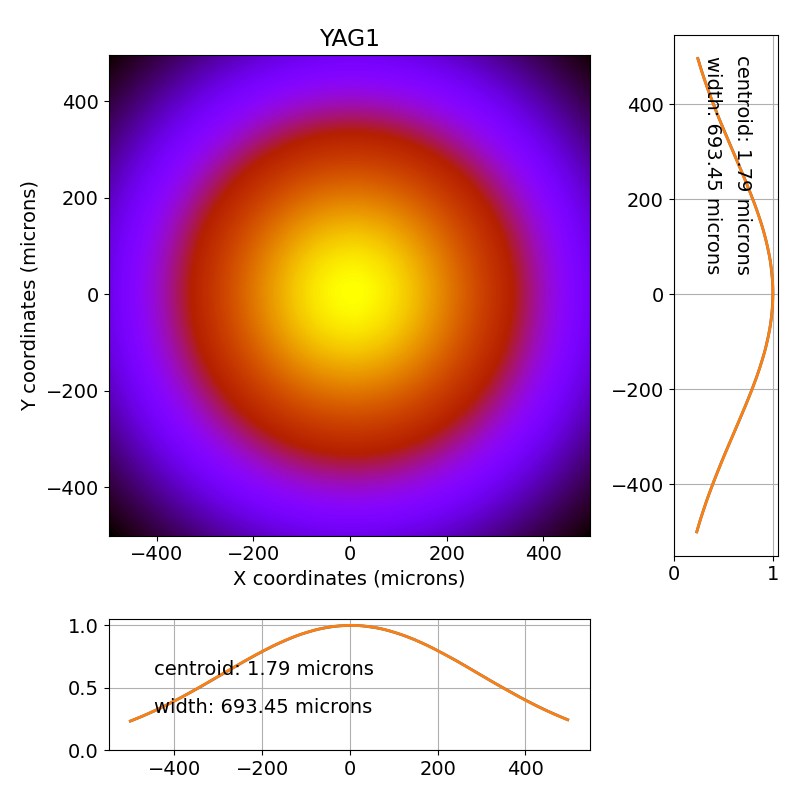

<IPython.core.display.Javascript object>


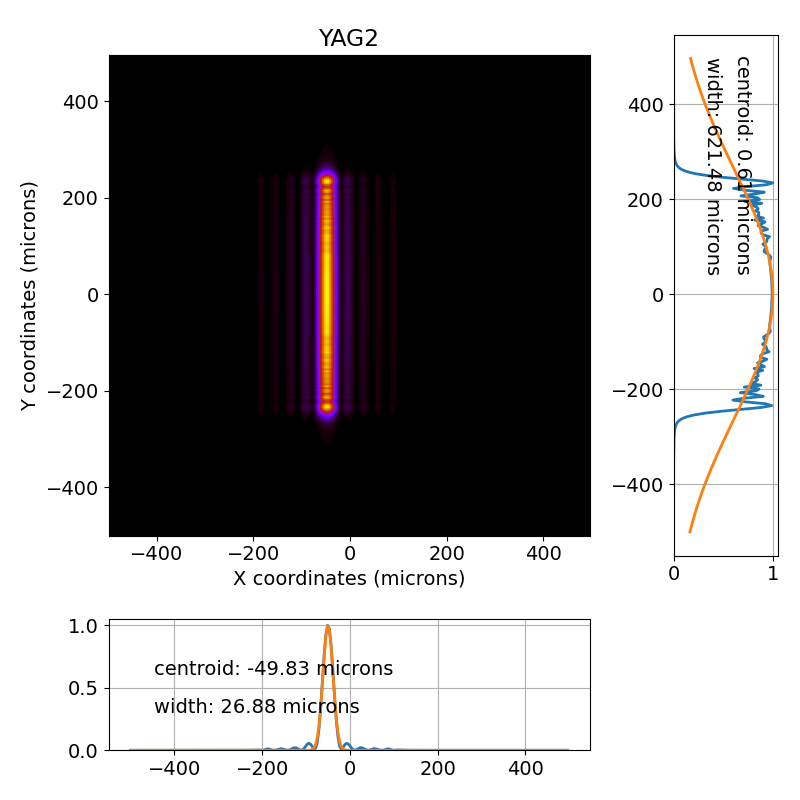

<IPython.core.display.Javascript object>


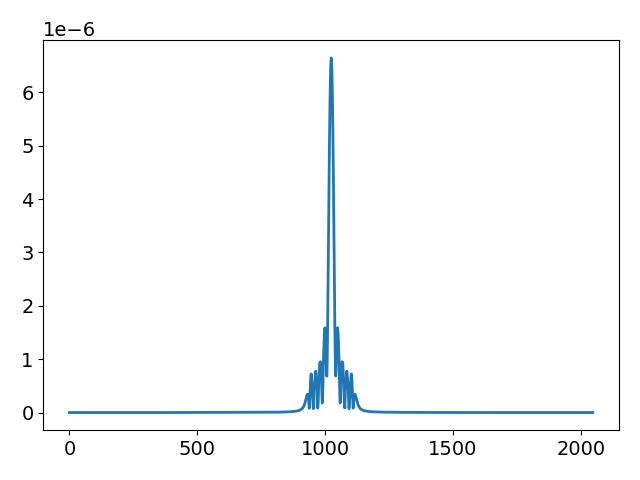

In [12]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [13]:
beam_params['photonEnergy'] = 14410

pulse_test = beam.Pulse(beam_params=beam_params, tau=500, time_window=10000)

In [14]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1', 'YAG2'])

FWHM in x: 151.86816498861313 microns
FWHM in y: 151.86816498861313 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214372748034288
8.214372748034288
x is focused
y is focused
mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfocused
y becomes unfocused
zx: 319.00
zy: 319.00
YAG1
zx: 319.00
zy: 319.00
drift3
zx: 319.90
zy: 319.90
slit
zx: 319.90
zy: 319.90
drift4
zx: 320.00
zy: 320.00
c1
zx: 3184.36
zy: 320.00
drift5
zx: 3184.46
zy: 320.10
c2
zx: 31691.71
zy: 320.10
drift6
zx: 31692.01
zy: 320.40
c3
zx: 2702.94
zy: 320.40
drift7
zx: 2703.04
zy: 320.50
c4
zx: 230.53
zy: 320.50
drift8
zx: 237.03
zy: 327.00
YAG2
zx: 237.03
zy: 327.00
FWHM in x: 151.86816049193575 microns
FWHM in y: 151.86816049193575 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214372994603641
8.214372994603641
x is focused
y is focused
mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becom

zx: 3184.44
zy: 320.00
drift5
zx: 3184.54
zy: 320.10
c2
zx: 31691.81
zy: 320.10
drift6
zx: 31692.11
zy: 320.40
c3
zx: 2703.11
zy: 320.40
drift7
zx: 2703.21
zy: 320.50
c4
zx: 230.56
zy: 320.50
drift8
zx: 237.06
zy: 327.00
YAG2
zx: 237.06
zy: 327.00
FWHM in x: 151.86811102850203 microns
FWHM in y: 151.86811102850203 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.21437570686654
8.21437570686654
x is focused
y is focused
mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfocused
y becomes unfocused
zx: 319.00
zy: 319.00
YAG1
zx: 319.00
zy: 319.00
drift3
zx: 319.90
zy: 319.90
slit
zx: 319.90
zy: 319.90
drift4
zx: 320.00
zy: 320.00
c1
zx: 3184.44
zy: 320.00
drift5
zx: 3184.54
zy: 320.10
c2
zx: 31691.82
zy: 320.10
drift6
zx: 31692.12
zy: 320.40
c3
zx: 2703.13
zy: 320.40
drift7
zx: 2703.23
zy: 320.50
c4
zx: 230.57
zy: 320.50
drift8
zx: 237.07
zy: 327.00
YAG2
zx: 237.07
zy: 327.00
FWHM in x: 151.86810653182783 microns
FWHM in

zx: 3184.52
zy: 320.00
drift5
zx: 3184.62
zy: 320.10
c2
zx: 31691.92
zy: 320.10
drift6
zx: 31692.22
zy: 320.40
c3
zx: 2703.30
zy: 320.40
drift7
zx: 2703.40
zy: 320.50
c4
zx: 230.60
zy: 320.50
drift8
zx: 237.10
zy: 327.00
YAG2
zx: 237.10
zy: 327.00
FWHM in x: 151.86805706842998 microns
FWHM in y: 151.86805706842998 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214378665698796
8.214378665698796
x is focused
y is focused
mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfocused
y becomes unfocused
zx: 319.00
zy: 319.00
YAG1
zx: 319.00
zy: 319.00
drift3
zx: 319.90
zy: 319.90
slit
zx: 319.90
zy: 319.90
drift4
zx: 320.00
zy: 320.00
c1
zx: 3184.53
zy: 320.00
drift5
zx: 3184.63
zy: 320.10
c2
zx: 31691.93
zy: 320.10
drift6
zx: 31692.23
zy: 320.40
c3
zx: 2703.31
zy: 320.40
drift7
zx: 2703.41
zy: 320.50
c4
zx: 230.60
zy: 320.50
drift8
zx: 237.10
zy: 327.00
YAG2
zx: 237.10
zy: 327.00
FWHM in x: 151.8680525717591 microns
FWHM i

zx: 3184.60
zy: 320.00
drift5
zx: 3184.70
zy: 320.10
c2
zx: 31692.03
zy: 320.10
drift6
zx: 31692.33
zy: 320.40
c3
zx: 2703.49
zy: 320.40
drift7
zx: 2703.59
zy: 320.50
c4
zx: 230.63
zy: 320.50
drift8
zx: 237.13
zy: 327.00
YAG2
zx: 237.13
zy: 327.00
FWHM in x: 151.86800310839718 microns
FWHM in y: 151.86800310839718 microns
FWHM Divergence (x): 2.2 μrad
FWHM Divergence (y): 2.2 μrad
8.214381624531047
8.214381624531047
x is focused
y is focused
mr1l0
zx: 70.00
zy: 70.00
drift1
zx: 77.29
zy: 77.29
mr2l0
zx: 77.29
zy: 77.29
drift2
x becomes unfocused
y becomes unfocused
zx: 319.00
zy: 319.00
YAG1
zx: 319.00
zy: 319.00
drift3
zx: 319.90
zy: 319.90
slit
zx: 319.90
zy: 319.90
drift4
zx: 320.00
zy: 320.00
c1
zx: 3184.61
zy: 320.00
drift5
zx: 3184.71
zy: 320.10
c2
zx: 31692.04
zy: 320.10
drift6
zx: 31692.34
zy: 320.40
c3
zx: 2703.50
zy: 320.40
drift7
zx: 2703.60
zy: 320.50
c4
zx: 230.63
zy: 320.50
drift8
zx: 237.13
zy: 327.00
YAG2
zx: 237.13
zy: 327.00
FWHM in x: 151.86799861172952 microns
FWHM 

In [64]:
80/200

0.4

<IPython.core.display.Javascript object>


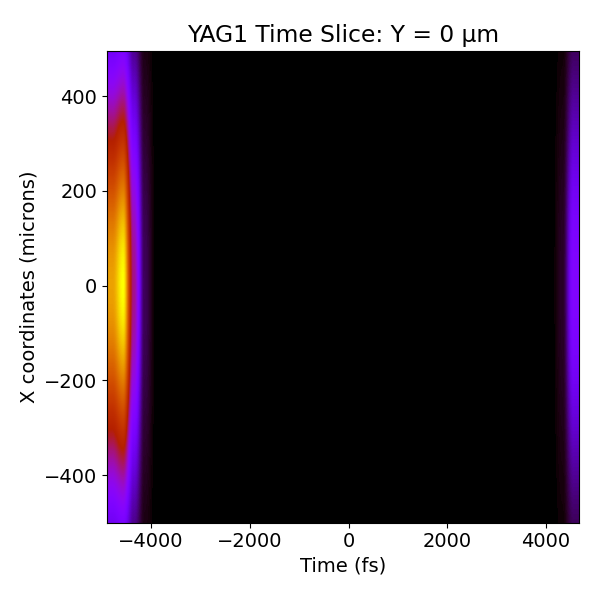

128


<IPython.core.display.Javascript object>


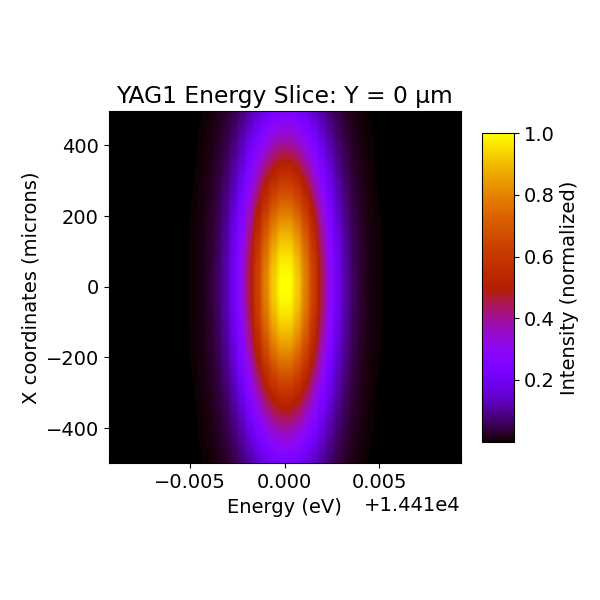

<IPython.core.display.Javascript object>


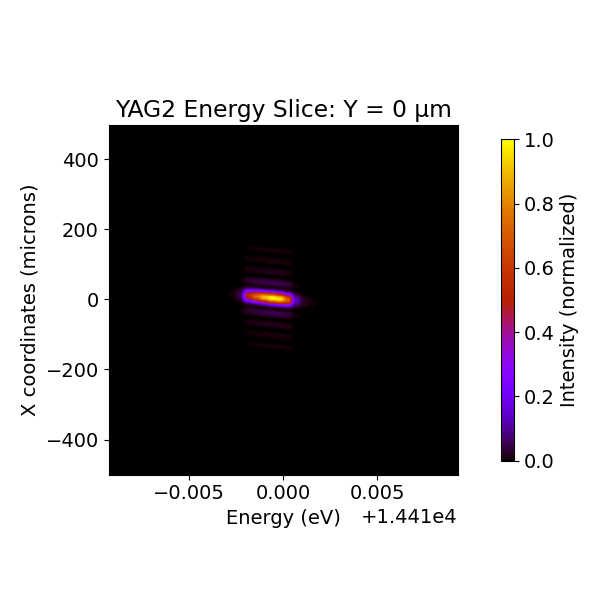

<IPython.core.display.Javascript object>


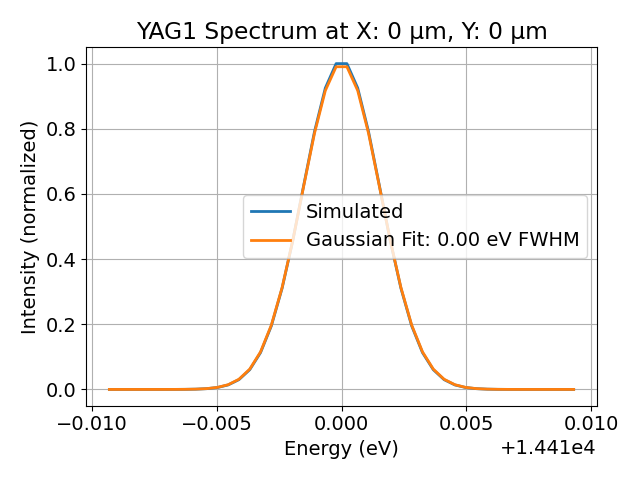

<IPython.core.display.Javascript object>


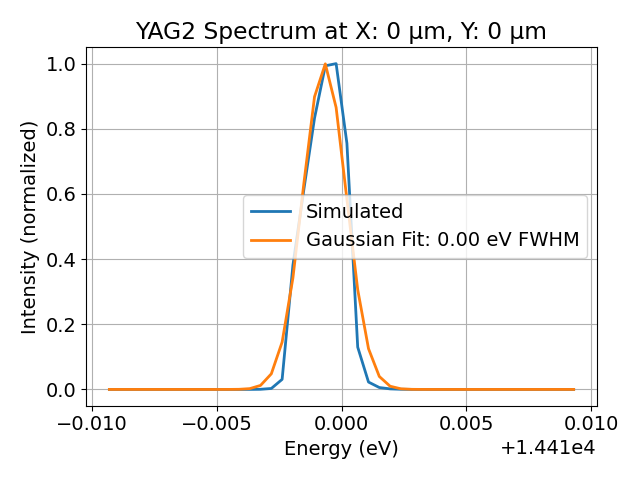

<IPython.core.display.Javascript object>


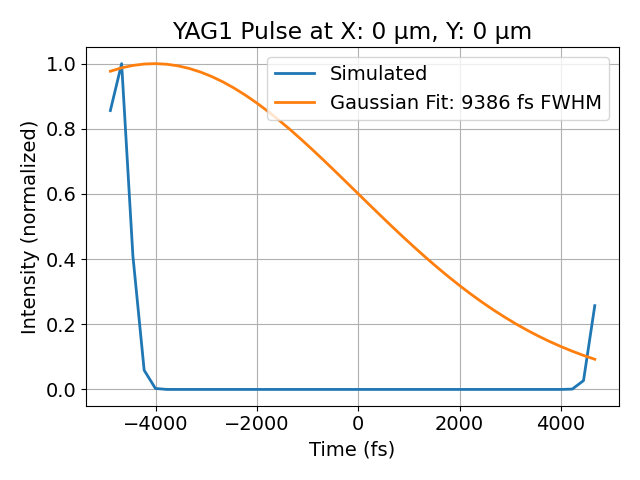

<IPython.core.display.Javascript object>


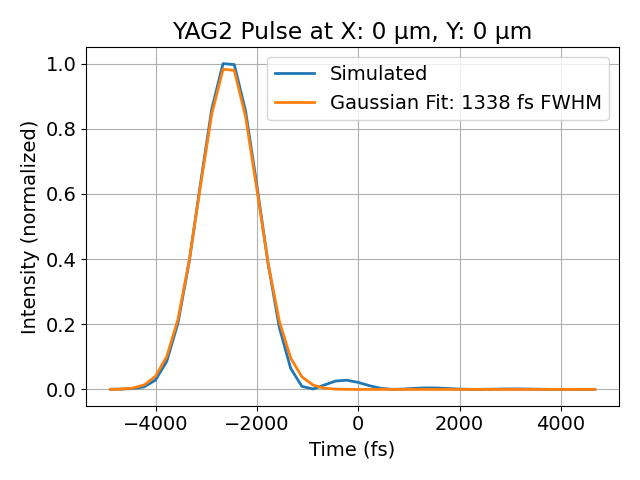

In [15]:
pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2')
pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
# pulse_test.imshow_energy_slice('IP')
# pulse_test.imshow_projection('IP')
# pulse_test.imshow_time_slice('IP')

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8